In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime, timedelta
from influxdb import InfluxDBClient
from pandas import DataFrame, Series
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = (10, 5)

%matplotlib inline

In [8]:
# view first 5 elements of our data
df = pd.read_csv ('loradata1.csv')
df.head()

,Unnamed: 0,time,data_rate,rssi,sensor,snr
0,0,2019-10-24 13:47:57.612864+00:00,SF12BW125,-106,trial,1.8
1,1,2019-10-24 13:48:23.223511808+00:00,SF12BW125,-103,trial,5.2
2,2,2019-10-24 13:48:28.411788032+00:00,SF12BW125,-98,trial,6.0
3,3,2019-10-24 13:48:34.752850176+00:00,SF12BW125,-105,trial,5.8
4,4,2019-10-24 13:48:40.263343104+00:00,SF12BW125,-102,trial,3.2


In [12]:
# SELECTING DATA FOR DATA-POINT 1 at 100m ONLY
point1 =df[df['sensor'].str[4]=='1']
dfx = point1[(point1['time'] >= '2019-10-28 07:45:00') & (point1['time'] <= '2019-10-28 09:04:00')]

print(type(point1))
#print(point1)
#print(dfx)

<class 'pandas.core.frame.DataFrame'>


In [13]:
# convert data type of time to datetime
dfx[['time']] = dfx[['time']].apply(pd.to_datetime)

C:\Users\humph\AppData\Local\Temp\ipykernel_11132\2238157785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[['time']] = dfx[['time']].apply(pd.to_datetime)


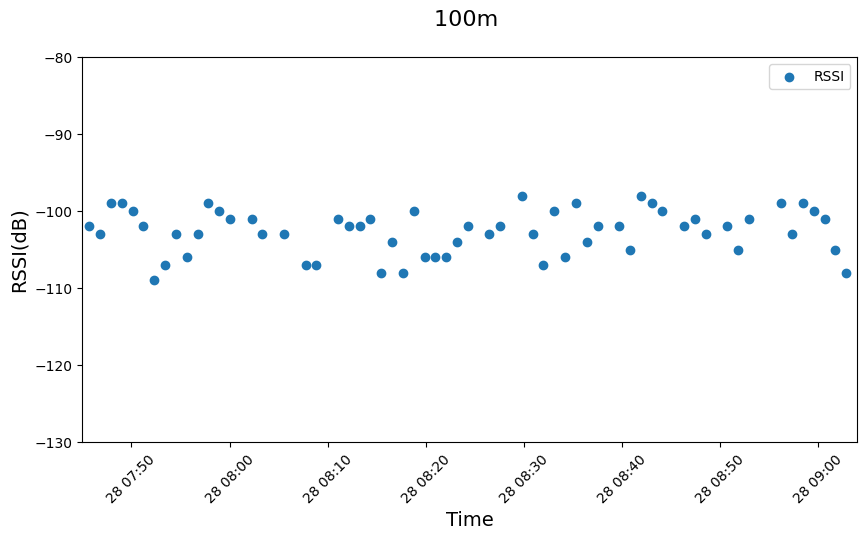

In [14]:
# PLOT DATA AT 100m

plt.figure(figsize =(10, 5))
plt.scatter(dfx['time'], dfx['rssi']) 
plt.xlim(['2019-10-28 07:45:00'],['2019-10-28 09:04:00'])
plt.ylim(-130, -80)
plt.legend(['RSSI']);
plt.xticks(rotation=45);
plt.title('100m \n', size = 16)
plt.xlabel('Time', size = 14);
plt.ylabel('RSSI(dB)', size = 14);
#plt.tight_layout()

In [15]:
# silhouette_score is used to evaluate the optimum number of clusters needed for a particular dataset

rssi_array = np.array(dfx['rssi']).reshape(-1, 1) # convert the dataframe column to an array and reshape it.
from sklearn.metrics import silhouette_samples, silhouette_score 
kmax = 13 # set the maximum number of clusters - running iterations
for k in range(2, kmax+1):  
    kmeans = KMeans(n_clusters = k).fit(rssi_array)   
    labels = kmeans.labels_  
    silhouette_avg = silhouette_score(rssi_array, labels, metric = 'euclidean') # euclidean distance from the centre
    
    print("For k_clusters =", k, "The average silhouette_score is :", silhouette_avg) # score and cluster
    sample_silhouette_values = silhouette_samples(rssi_array,labels)
    # select the k_clusters with the highest silhoutte_score == Hence k = 2

C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k_clusters = 2 The average silhouette_score is : 0.6288688169124413
For k_clusters = 3 The average silhouette_score is : 0.6229769855244381
For k_clusters = 4 The average silhouette_score is : 0.6080828642331286
For k_clusters = 5 The average silhouette_score is : 0.6380713808082841
For k_clusters = 6 The average silhouette_score is : 0.6975912905784459


C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

For k_clusters = 7 The average silhouette_score is : 0.7343747948910992
For k_clusters = 8 The average silhouette_score is : 0.8271336332749376
For k_clusters = 9 The average silhouette_score is : 0.8598214285714285
For k_clusters = 10 The average silhouette_score is : 0.93125


C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k_clusters = 11 The average silhouette_score is : 0.975
For k_clusters = 12 The average silhouette_score is : 0.9833333333333333
For k_clusters = 13 The average silhouette_score is : 0.9833333333333333


C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\humph\AppData\Local\Temp\ipykernel_11132\959135861.py:7: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters = k).fit(rssi_array)


C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

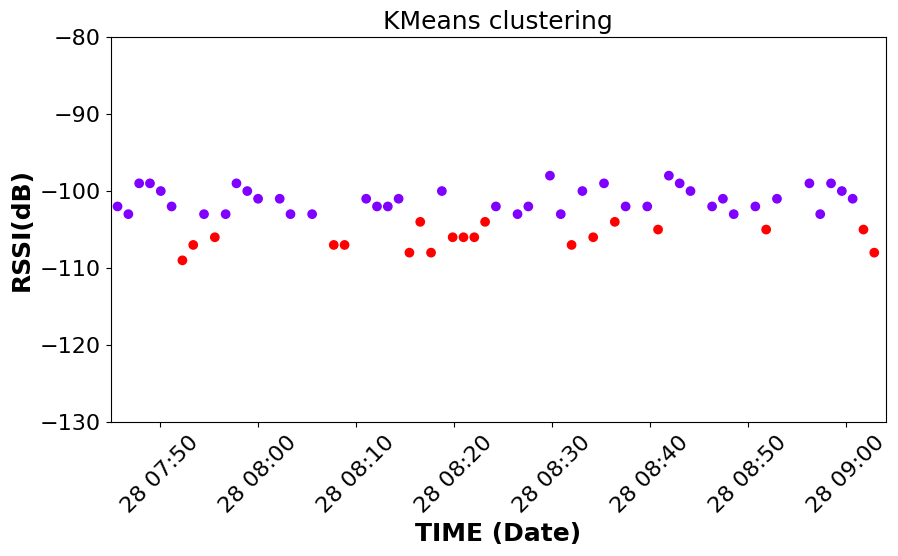

<Figure size 1000x500 with 0 Axes>

In [16]:
num_of_clusters = 2  
rssi_pred = KMeans(n_clusters = num_of_clusters, random_state = 200).fit(rssi_array) # fitting the data
plt.scatter(dfx['time'],rssi_array, c = rssi_pred.labels_, cmap = 'rainbow') # plotting
plt.title('KMeans clustering', fontsize = 18)
plt.xlabel('TIME (Date)', fontsize = 18, weight = 'bold')
plt.ylabel('RSSI(dB)', fontsize = 18, weight = 'bold')
plt.xlim(['2019-10-28 07:45:00'],['2019-10-28 09:04:00'])
plt.ylim(-130, -80)
plt.xticks(rotation=45);
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.figure(figsize =(10, 5))
plt.show

C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


41 -101.04878048780488
19 -106.21052631578948


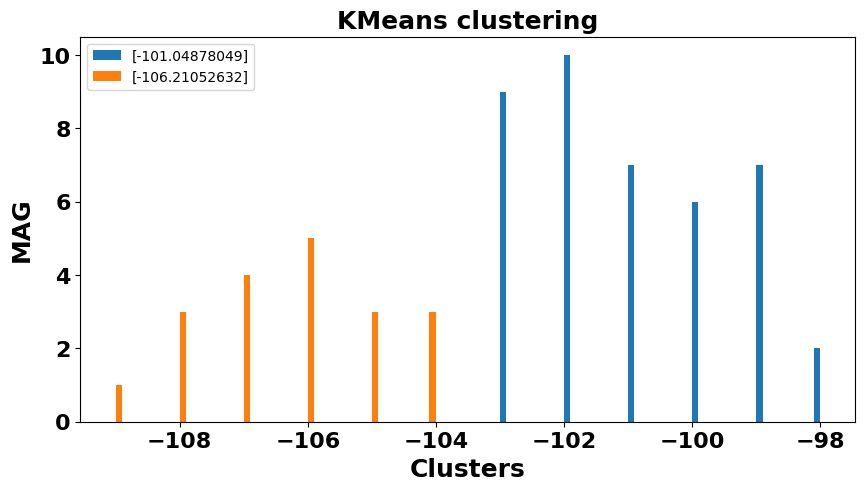

In [17]:
num_of_clusters = 2
rssi_pred2 = KMeans(n_clusters = num_of_clusters, random_state = 200).fit_predict(rssi_array)
plt.figure(figsize =(10, 5))
for indx in range (num_of_clusters):
    rssi_clusters = rssi_array[rssi_pred2 == indx]
    plt.hist(rssi_clusters, 50);
    plt.title('KMeans clustering', fontsize = 18, weight = 'bold')
    plt.xlabel('Clusters', fontsize = 18, weight = 'bold')
    plt.ylabel('MAG', fontsize = 18, weight = 'bold')
    plt.xticks(fontsize = 16, weight = 'bold')
    plt.yticks(fontsize = 16, weight = 'bold')
    plt.legend(rssi_pred.cluster_centers_, loc = "upper left")
    print(len(rssi_clusters), rssi_clusters.mean())

In [18]:
# clean dataset
majority_index = (max(set(list(rssi_pred2)), key = list(rssi_pred2).count))
kmeans_index = list(rssi_pred2)
dfx['kmeans_index'] = kmeans_index
df_clean = dfx.drop(dfx[dfx.kmeans_index != majority_index].index)

C:\Users\humph\AppData\Local\Temp\ipykernel_11132\1706157828.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['kmeans_index'] = kmeans_index


<function matplotlib.pyplot.show(close=None, block=None)>

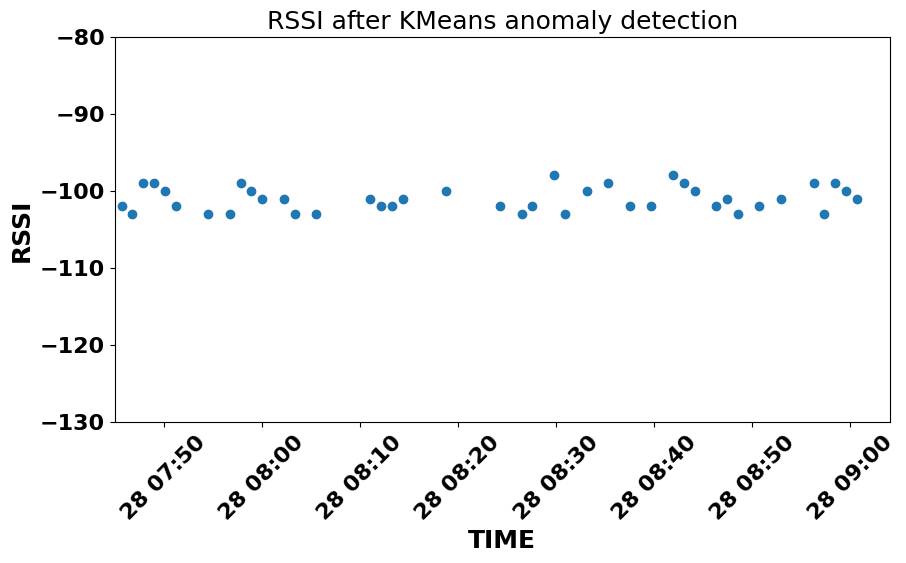

In [19]:
# plotting

plt.figure(figsize =(10, 5))
plt.scatter(df_clean['time'],df_clean['rssi']) # plotting
plt.title('RSSI after KMeans anomaly detection', fontsize=18)
plt.xlabel('TIME', fontsize = 18, weight = 'bold')
plt.ylabel('RSSI', fontsize = 18, weight = 'bold')
plt.xlim(['2019-10-28 07:45:00'],['2019-10-28 09:04:00'])
plt.ylim(-130, -80)
plt.xticks(rotation=45);
plt.xticks(fontsize = 16, weight = 'bold')
plt.yticks(fontsize = 16, weight = 'bold')
plt.rcParams['figure.figsize'] = (8, 4)
plt.show

In [20]:
# SELECTING DATA FOR DATA-POINT 2 at 200m ONLY

point2 =df[df['sensor'].str[4]=='2']
point2_time = point2.set_index(['time'])
point2_time3=(point2_time.loc['2019-10-28 07:40:00':'2019-10-28 10:30:00'])
numpyarray_200=np.array(point2_time3["rssi"])
numpyarray_200

array([-105, -102, -104, -105, -105, -108, -106, -108, -106, -107, -106,
       -108, -108, -104, -109, -108, -106, -108, -104, -106, -107, -104,
       -107, -107, -105, -107, -109, -108, -106, -108, -106, -109, -108,
       -108, -111, -106, -109, -106, -107, -108, -105, -109, -103, -103,
       -108, -109, -108, -105, -107, -106, -109, -107, -107, -105, -105,
       -103, -104, -106], dtype=int64)

In [21]:
mean_rssi_200=np.mean(numpyarray_200)
mean_rssi_200

-106.51724137931035

In [22]:
# SELECTING DATA FOR DATA-POINT 3 at 300m ONLY

point3 =df[df['sensor'].str[4]=='3']
point3_time = point3.set_index(['time'])
point3_time4=(point3_time.loc['2019-10-28 07:40:00':'2019-10-28 10:15:00'])
numpyarray_300=np.array(point3_time4["rssi"])
numpyarray_300

array([ -97,  -94,  -96,  -97,  -95,  -97,  -94,  -94,  -96,  -96,  -97,
        -95,  -96,  -96,  -96,  -95,  -97,  -95,  -94,  -96,  -94,  -96,
        -96,  -99,  -96,  -97,  -97,  -97,  -96,  -97,  -94,  -95,  -96,
        -96,  -96,  -93,  -96,  -94,  -96,  -97,  -96,  -96,  -95,  -96,
        -96,  -95,  -95,  -99,  -96,  -95,  -96,  -97,  -96,  -99,  -95,
       -110, -108], dtype=int64)

In [23]:
mean_rssi_300=np.mean(numpyarray_300)
mean_rssi_300

-96.33333333333333

In [24]:
# SELECTING DATA FOR DATA-POINT 4 at 400m ONLY

point4 =df[df['sensor'].str[4]=='1']
point4_time = point4.set_index(['time'])
point4_time5=(point4_time.loc['2019-10-28 11:00:00':'2019-10-28 12:23:00'])
numpyarray_400=np.array(point4_time5["rssi"])
numpyarray_400

array([ -99,  -96, -100,  -99, -100,  -99, -103, -107, -102,  -99,  -99,
        -99,  -97, -102,  -96, -100, -103,  -97,  -97, -101,  -99,  -99,
        -99, -102, -102, -100, -102,  -98, -103, -101, -101, -103, -103,
       -101, -103, -102,  -99, -100,  -99,  -97, -102,  -98, -102,  -99,
       -100, -105, -105, -101, -102,  -99,  -98, -103, -101, -101, -103,
       -101,  -97, -102, -103, -101], dtype=int64)

In [25]:
mean_rssi_400=np.mean(numpyarray_400)
mean_rssi_400

-100.51666666666667

In [26]:
# SELECTING DATA FOR DATA-POINT 6 at 600m ONLY

point6 =df[df['sensor'].str[4]=='3']
point6_time = point6.set_index(['time'])
point6_time7=(point6_time.loc['2019-10-28 11:00:00':'2019-10-28 12:13:00'])
numpyarray_600=np.array(point6_time7["rssi"])
numpyarray_600

array([-112, -112, -107, -113, -108, -111, -109, -109, -108, -109, -109,
       -113, -110, -109, -109, -108, -109, -109, -106, -112, -108, -106,
       -112, -113, -107, -111, -108, -109, -112, -112, -113, -108, -107,
       -113, -108, -112, -111, -109, -108, -109, -108, -109, -108, -111,
       -110, -107, -109, -109, -113], dtype=int64)

In [27]:
mean_rssi_600=np.mean(numpyarray_600)
mean_rssi_600

-109.63265306122449

In [28]:
# SELECTING DATA FOR DATA-POINT 7 at 700m ONLY

point7 =df[df['sensor'].str[4]=='1']
point7_time = point7.set_index(['time'])
point7_time8=(point7_time.loc['2019-10-28 13:30:00':'2019-10-28 15:20:00'])
numpyarray_700=np.array(point7_time8["rssi"])
numpyarray_700

array([-106, -106, -109, -107, -107, -112, -108, -107, -109, -109, -106,
       -109, -108, -109, -107, -109, -108, -108, -109, -108, -106, -109,
       -107, -109, -108, -108, -109, -109, -109, -108, -109, -108, -107,
       -107, -109, -111, -108, -108, -108, -109, -108, -108, -109, -108,
       -109, -109, -109, -108, -109, -109, -107, -107, -107], dtype=int64)

In [29]:
mean_rssi_700=np.mean(numpyarray_700)
mean_rssi_700

-108.18867924528301

In [30]:
# SELECTING DATA FOR DATA-POINT 8 at 800m ONLY

point8 =df[df['sensor'].str[4]=='2']
point8_time = point8.set_index(['time'])
point8_time9=(point8_time.loc['2019-10-28 13:30:00':'2019-10-28 15:20:00'])
numpyarray_800=np.array(point8_time9["rssi"])
numpyarray_800

array([-111, -112, -113, -111, -113, -113, -113, -110, -112, -113, -113,
       -113, -113, -112, -113, -111, -112, -111, -113, -113, -111, -111,
       -111, -111, -113, -113, -112, -112, -112, -113, -111, -111, -112,
       -111, -113, -112, -111, -111, -113, -112, -111, -110, -108, -113,
       -113, -112, -109, -113, -112, -112, -113, -109, -113, -113, -112,
       -112], dtype=int64)

In [31]:
mean_rssi_800=np.mean(numpyarray_800)
mean_rssi_800

-111.89285714285714

In [32]:
# SELECTING DATA FOR DATA-POINT 9 at 900m ONLY

point9 =df[df['sensor'].str[4]=='3']
point9_time = point6.set_index(['time'])
point9_time10=(point9_time.loc['2019-10-28 13:30:00':'2019-10-28 15:20:00'])
numpyarray_900=np.array(point9_time10["rssi"])
numpyarray_900

array([-114, -113, -113, -113, -113, -112, -112, -113, -112, -113, -113,
       -111, -113, -113, -112, -110, -113, -113, -113, -113, -113, -113,
       -112, -111, -113, -113, -111, -111, -112, -111, -112, -114, -112,
       -111, -112, -110, -112, -112, -110, -112, -112, -113, -113, -113,
       -109, -111, -113, -113, -112, -113, -111, -112], dtype=int64)

In [33]:
mean_rssi_900=np.mean(numpyarray_900)
mean_rssi_900

-112.1923076923077

In [34]:
# SELECTING DATA FOR DATA-POINT 10 at 1000m ONLY

point10 =df[df['sensor'].str[4]=='1']
point10_time = point10.set_index(['time'])
point10_time11=(point10_time.loc['2019-10-29 08:00:00':'2019-10-29 10:20:00'])
numpyarray_1000=np.array(point10_time11["rssi"])
numpyarray_1000

array([-113, -110, -113, -112, -114, -114, -113, -113, -113, -114, -114,
       -112, -115, -114, -113, -112, -113, -114, -114, -113, -112, -112,
       -113, -109, -113, -113, -111, -113, -111, -113, -112, -112, -111,
       -112, -113, -111, -113, -113, -112, -111, -113, -112, -110, -111,
       -112, -113, -110, -112, -112, -110, -113, -110, -112, -112, -113,
       -110, -108, -112, -112, -111, -110, -113], dtype=int64)

In [35]:
mean_rssi_1000=np.mean(numpyarray_1000)
mean_rssi_1000

-112.16129032258064

In [36]:
# SELECTING DATA FOR DATA-POINT 12 at 1200m ONLY

point12 =df[df['sensor'].str[4]=='3']
point12_time = point10.set_index(['time'])
point12_time13=(point12_time.loc['2019-10-29 08:00:00':'2019-10-29 10:20:00'])
numpyarray_1200=np.array(point12_time13["rssi"])
numpyarray_1200

array([-113, -110, -113, -112, -114, -114, -113, -113, -113, -114, -114,
       -112, -115, -114, -113, -112, -113, -114, -114, -113, -112, -112,
       -113, -109, -113, -113, -111, -113, -111, -113, -112, -112, -111,
       -112, -113, -111, -113, -113, -112, -111, -113, -112, -110, -111,
       -112, -113, -110, -112, -112, -110, -113, -110, -112, -112, -113,
       -110, -108, -112, -112, -111, -110, -113], dtype=int64)

In [37]:
mean_rssi_1200=np.mean(numpyarray_1200)
mean_rssi_1200

-112.16129032258064

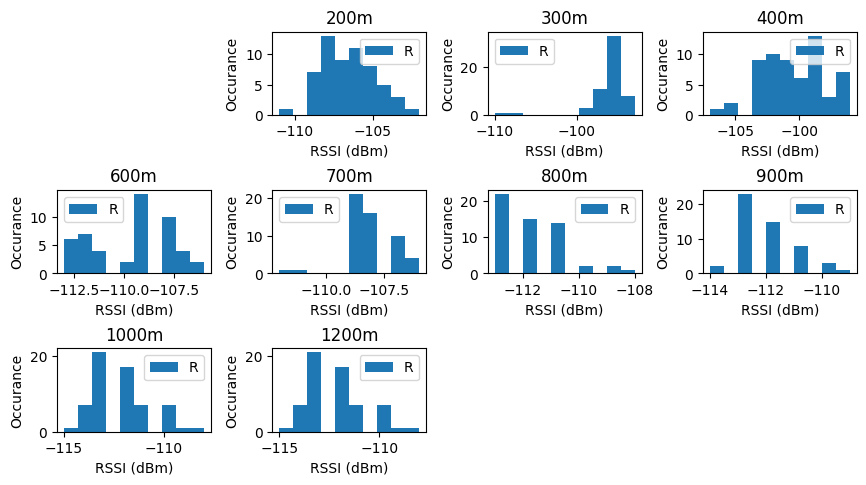

In [72]:
# Initialise the subplot function using number of rows and columns 

# # 100m
# plt.subplot(3,4,1)
# plt.hist(numpyarray_100)
# plt.legend('RSSI')
# plt.title('100m')
# plt.ylabel('Occurance');
# plt.xlabel('RSSI (dBm)');

# 200m
plt.subplot(3,4,2)
plt.hist(numpyarray_200)
plt.title('200m')
plt.legend('RSSI')
plt.ylabel('Occurance');
plt.xlabel('RSSI (dBm)');

# 300m
plt.subplot(3,4,3)
plt.hist(numpyarray_300)
plt.title('300m')
plt.legend('RSSI')
plt.ylabel('Occurance');
plt.xlabel('RSSI (dBm)');

# 400m
plt.subplot(3,4,4)
plt.hist(numpyarray_400)
plt.title('400m')
plt.legend('RSSI')
plt.ylabel('Occurance');
plt.xlabel('RSSI (dBm)');

# 600m
plt.subplot(3,4,5)
plt.hist(numpyarray_600)
plt.legend('RSSI')
plt.title('600m')
plt.ylabel('Occurance');
plt.xlabel('RSSI (dBm)');

# 700m
plt.subplot(3,4,6)
plt.hist(numpyarray_700)
plt.title('700m')
plt.legend('RSSI')
plt.ylabel('Occurance');
plt.xlabel('RSSI (dBm)');

# 800m
plt.subplot(3,4,7)
plt.hist(numpyarray_800)
plt.title('800m')
plt.legend('RSSI')
plt.ylabel('Occurance');
plt.xlabel('RSSI (dBm)');

# 900m
plt.subplot(3,4,8)
plt.hist(numpyarray_900)
plt.title('900m')
plt.legend('RSSI')
plt.ylabel('Occurance');
plt.xlabel('RSSI (dBm)');

# 1000m
plt.subplot(3,4,9)
plt.hist(numpyarray_1000)
plt.title('1000m')
plt.legend('RSSI')
plt.ylabel('Occurance');
plt.xlabel('RSSI (dBm)');

# 1200m
plt.subplot(3,4,10)
plt.hist(numpyarray_1200)
plt.title('1200m')
plt.legend('RSSI')
plt.ylabel('Occurance');
plt.xlabel('RSSI (dBm)');

# set the spacing between subplots
plt.subplots_adjust(left=0.0, bottom=0.0,right=1,top=1,wspace=0.4,hspace=0.9)

# Combine all the operations and display
plt.show()

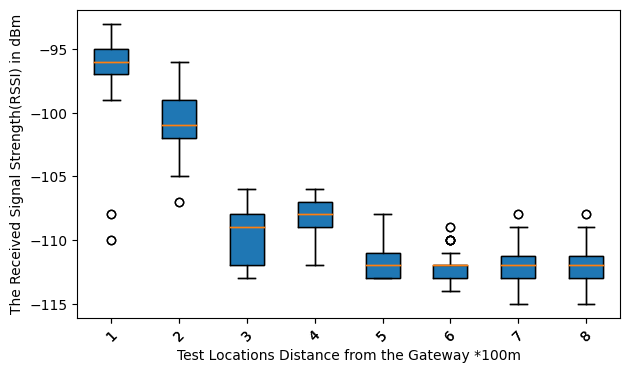

In [63]:
box_plot_data=[numpyarray_300,numpyarray_400,numpyarray_600,numpyarray_700,numpyarray_800,numpyarray_900,numpyarray_1000,numpyarray_1200]
plt.figure(figsize =(7, 4))
plt.boxplot(box_plot_data)
plt.xticks(rotation=45);

#plt.title('WHISKER AND BOX PLOTS FOR THE 10 TEST POINTS')
plt.xlabel('Test Locations Distance from the Gateway *100m');
plt.ylabel('The Received Signal Strength(RSSI) in dBm');
plt.boxplot(box_plot_data,patch_artist=True)
plt.savefig("LoRa.png", bbox_inches = 'tight', dpi=600)

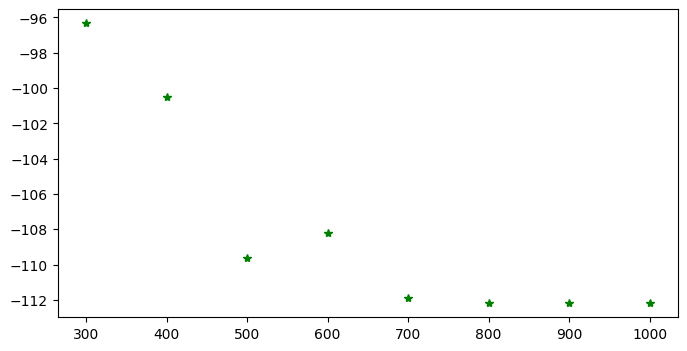

In [67]:
RSSI=[mean_rssi_300,mean_rssi_400,mean_rssi_600,mean_rssi_700,mean_rssi_800,mean_rssi_900,mean_rssi_1000,mean_rssi_1200]
D=[300,400,500,600,700,800,900,1000]
plt.plot(D,RSSI,"g*")
plt.show()

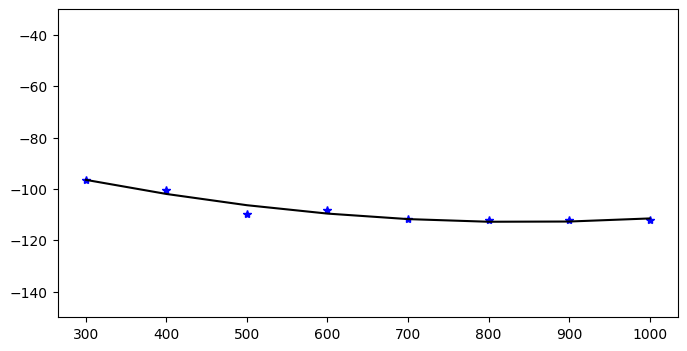

In [68]:
polynomialOrder =2
coefficients = np.polyfit(D,RSSI,polynomialOrder)  # find the coefficients for a polynomialOrder order polynomial to make a best fit
p = np.poly1d(coefficients)                     # This makes the polynomial class of a polynomialOrder order polynomial with the best fit coefficients
polynomial2 = p(D)                               # This calculates the polynomial at every data point. This is the data you plot.

fig = plt.figure()
plt.plot(D,RSSI,'b*', D, polynomial2, 'k')
plt.ylim([-150, -30]);
plt.show()

### x=np.linspace(0.1,1.3,1000)
RSSI=[mean_rssi_100,mean_rssi_200,mean_rssi_300,mean_rssi_400,mean_rssi_600,mean_rssi_700,mean_rssi_800,mean_rssi_900,mean_rssi_1000,mean_rssi_1200]
D=[100,200,300,400,500,600,700,800,900,1000]
poly_deg=4
coefs=np.polyfit(D,RSSI,poly_deg)
y_poly=np.polyval(coefs, x)
plt.plot(D,RSSI,"*",x,y_poly,'k')
plt.plot(label="polynomial fit")


In [70]:
x=np.linspace(0.1,1.3,1000)
RSSI=[mean_rssi_100,mean_rssi_200,mean_rssi_300,mean_rssi_400,mean_rssi_600,mean_rssi_700,mean_rssi_800,mean_rssi_900,mean_rssi_1000,mean_rssi_1200] 
D=[100,200,300,400,500,600,700,800,900,1000] 
poly_deg=4 
coefs=np.polyfit(D,RSSI,poly_deg) 
y_poly=np.polyval(coefs, x) 
plt.plot(D,RSSI,"*",x,y_poly,'k')
plt.plot(label="polynomial fit")

NameError: name 'mean_rssi_100' is not defined